# Simple Neural Net vs Regression

In this notebook, I make some toy data and see if a small neural net can fit it. To compare, we see what ordinary regerssion does, and then we throw it into tensorflow. Finally, I run my own custom-built neural net code on it.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import tensorflow as tf

Text(0.5, 1.0, 'The Data')

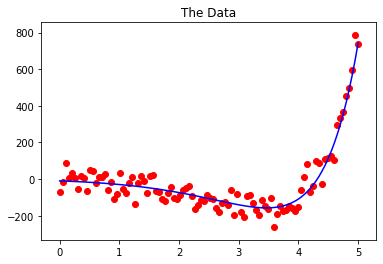

In [5]:
X = np.linspace(0,5,100)

def f(x):
    return exp(x)*(x**2-2*x-10)

fct_Y = [f(x) for x in X]
rnd_Y = [f(x) + np.random.normal(0,50) for x in X]

plt.plot(X,fct_Y, color='b')
plt.scatter(X,rnd_Y, color='r')
mean_y = np.array(rnd_Y).mean()
plt.title('The Data')


NameError: name 'X_scaled' is not defined

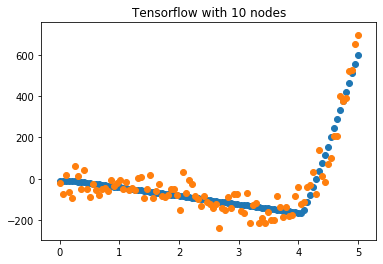

In [23]:
from sklearn.preprocessing import StandardScaler


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
    units=10,
    activation='relu',
    input_shape = (1,)
))
model.add(tf.keras.layers.Dense(
    units=1))

sgd = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model.compile(optimizer = sgd, loss='mean_squared_error')

X_scaled = StandardScaler().fit_transform(X.reshape(-1,1)).reshape(1,-1)[0]

model.fit(list(X_scaled), rnd_Y, epochs=1000, verbose=0)

preds = model.predict(list(X_scaled))

plt.title('Tensorflow with 10 nodes')
plt.scatter(X,preds)
plt.scatter(X, rnd_Y)


In [7]:
import babynn

MSE: 31278.7883
R-sq: -34.7218
-19.80433088419079


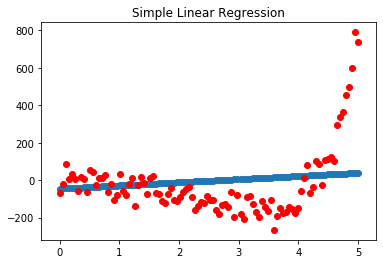

In [8]:
learnrate = 0.1



reg = babynn.linUnit(learnrate,1,1)
scorer = babynn.MSEScorer()

# train the linear regression model

for eon in range(10):
    for i,x in enumerate(X):
        # must feed the functions numpy arrays
        x_np = np.zeros(1)
        x_np[0] = x
        x_np = reg.forward(x_np)
        scorer.forward(x_np,rnd_Y[i])
        dY = scorer.backprop(np.ones(1))
        reg.backprop(dY)
    reg.update()

# get and plot training predictions
reg_Y = [float(reg.forward(x)) for x in X]

plt.scatter(X,reg_Y)
plt.scatter(X,rnd_Y, color='r')
plt.title('Simple Linear Regression')


mse_err = 0
mean_err = 0
for i,x in enumerate(X):
    mse_err += (reg_Y[i] - rnd_Y[i])**2
    mean_err += (reg_Y[i] - mean_y)**2
MSE = mse_err/len(X)
print('MSE: {:.4f}'.format(MSE))
print('R-sq: {:.4f}'.format(1-mse_err/mean_err))
print(mean_y)

Learn Rate:0.0001, Eons:10000
MSE: 5084.1956
R-sq: -4.8064


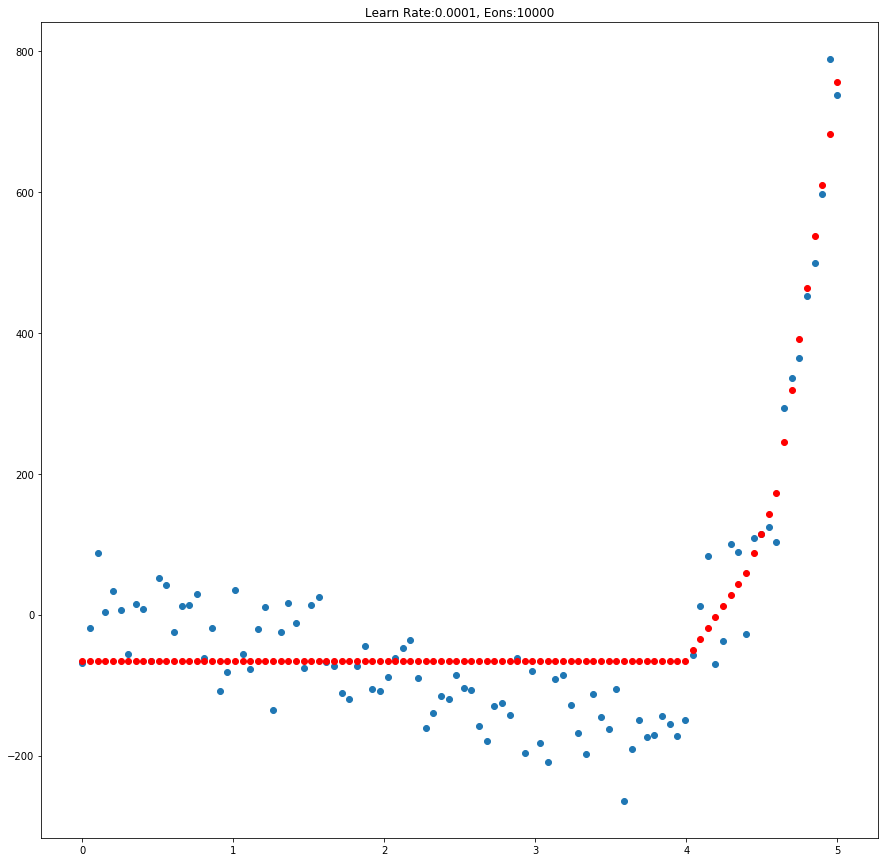

In [9]:
from sklearn.preprocessing import StandardScaler


X_scaled = StandardScaler().fit_transform(X.reshape(-1,1))

# to get the most out of this, I suggest playing with the various parameters
# interesting things happen at all extremes!


def plot_nn(layer_size_count, learnrate, eons, ax):

    nn_1 = babynn.linUnit(learnrate,1,layer_size_count)
    act_1 = babynn.maxAct(layer_size_count)
    nn_2 = babynn.linUnit(learnrate,layer_size_count,1)
    scorer = babynn.MSEScorer()

    nn = [nn_1, act_1, nn_2]

    for eon in range(eons):
        for i,x in enumerate(X_scaled):
            # must feed the functions numpy arrays
            x_np = np.zeros(1)
            x_np[0] = x
            for layer in nn:
                x_np = layer.forward(x_np)
            x_np = scorer.forward(x_np, rnd_Y[i])
            dY = np.array(scorer.backprop(1))
            for layer in reversed(nn):
                dY = layer.backprop(dY)
        for layer in reversed(nn):
            layer.update()

    preds = []
    # get predictions
    mse_err = 0
    for i, x in enumerate(X_scaled):
        x_np = np.zeros(1)
        x_np[0] = x
        for layer in nn:
            x_np = layer.forward(x_np)
        preds.append(x_np[0])
        mse_err += (preds[-1] - rnd_Y[i])**2
    mse_err = float(mse_err)
    print('Learn Rate:{}, Eons:{}'.format(learnrate, eons))
    print("MSE: {:.4f}".format(mse_err/len(X_scaled)))
    print("R-sq: {:.4f}".format(1-mse_err/mean_err))
    ax.scatter(X, rnd_Y)
    ax.scatter(X, preds, color='red')
    ax.set_title('Learn Rate:{}, Eons:{}'.format(learnrate, eons))
    
   
learnrates = [0.0001]
eons = [10000]
fig, axes = plt.subplots(len(learnrates), len(eons), figsize = (15,15))
for size in [10]:
    for i,learnrate in enumerate(learnrates):
        for j, eon in enumerate(eons):
            plot_nn(size, learnrate, eon, axes)#[i][j])
    
    


ModuleNotFoundError: No module named 'tf'